# Importing Modules

In [6]:
import pandas as pd

# Creating dataframe

In [7]:
df_bookings = pd.read_csv('datasets/fact_bookings.csv')
df_date = pd.read_csv('datasets/dim_date.csv')
df_hotels = pd.read_csv('datasets/dim_hotels.csv')
df_rooms = pd.read_csv('datasets/dim_rooms.csv')
df_agg_bookings = pd.read_csv('datasets/fact_aggregated_bookings.csv')

# Data exploration

<Axes: ylabel='booking_platform'>

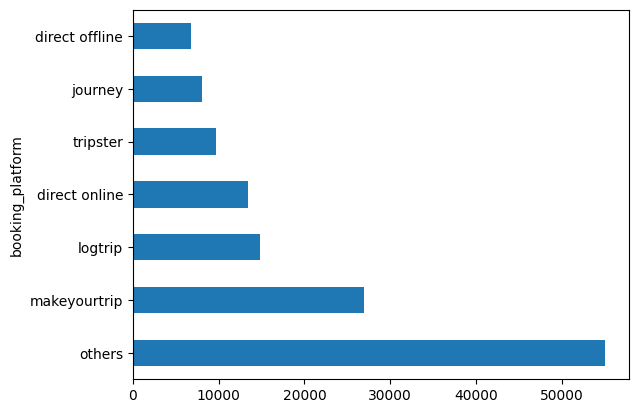

In [71]:
df_bookings['booking_platform'].value_counts().plot(kind='barh')

    Excerise 1: Find out the unique property ids aggregate bookings dataset

In [62]:
df_agg_bookings['property_id'].unique()

array([16559, 19562, 19563, 17558, 16558, 17560, 19558, 19560, 17561,
       16560, 16561, 16562, 16563, 17559, 17562, 17563, 18558, 18559,
       18561, 18562, 18563, 19559, 19561, 17564, 18560], dtype=int64)

    Exercise 2: Find out total booking per property_id 

In [63]:
df_agg_bookings.groupby('property_id')['successful_bookings'].sum()

property_id
16558    3153
16559    7338
16560    4693
16561    4418
16562    4820
16563    7211
17558    5053
17559    6142
17560    6013
17561    5183
17562    3424
17563    6337
17564    3982
18558    4475
18559    5256
18560    6638
18561    6458
18562    7333
18563    4737
19558    4400
19559    4729
19560    6079
19561    5736
19562    5812
19563    5413
Name: successful_bookings, dtype: int64

    Exercise 3: Find out days on which bookings are greater than capacity

In [64]:
df_agg_bookings[df_agg_bookings.successful_bookings > df_agg_bookings.capacity].check_in_date

3        1-May-22
12       1-May-22
4136    11-Jun-22
6209     2-Jul-22
8522    25-Jul-22
9194    31-Jul-22
Name: check_in_date, dtype: object

    Exercise 4: Find out properties that have highest capacity

In [65]:
df_agg_bookings[df_agg_bookings.capacity == df_agg_bookings.capacity.max()].property_id.unique()

array([17558], dtype=int64)

# Data cleaning

In [67]:
df_bookings.head(5)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920


In this above table there are some negative value so rather than complainig it to the data engineer we can get rid of it 

In [70]:
df_bookings.shape

(134590, 12)

In [75]:
df_bookings = df_bookings[df_bookings['no_guests'] > 0] 
df_bookings.shape

(134578, 12)

So now the new dataframe after cleansing is replaced with the previous datdframe

    Exercise 1: In aggregate bookings find columns that have null values. Fill these null values with whatever you think is appropriate substitute

In [80]:
df_agg_bookings.isnull().sum()

property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               2
dtype: int64

In [81]:
df_agg_bookings[df_agg_bookings.capacity.isnull()]

,property_id,check_in_date,room_category,successful_bookings,capacity
8,17561,1-May-22,RT1,22,NaN
14,17562,1-May-22,RT1,12,NaN


In [83]:
df_agg_bookings.capacity.fillna(df_agg_bookings.capacity.median(), inplace = True)

    Exercise 2: In aggregate bookings find out records that have successfull_bookings value greater than capacity. Filter those records

In [9]:
df_agg_bookings[df_agg_bookings.successful_bookings > df_agg_bookings.capacity]

,property_id,check_in_date,room_category,successful_bookings,capacity,ocp_prc
3,17558,1-May-22,RT1,30,19.0,1.578947
12,16563,1-May-22,RT1,100,41.0,2.439024
4136,19558,11-Jun-22,RT2,50,39.0,1.282051
6209,19560,2-Jul-22,RT1,123,26.0,4.730769
8522,19559,25-Jul-22,RT1,35,24.0,1.458333
9194,18563,31-Jul-22,RT4,20,18.0,1.111111


# Data Transformation

In [11]:
df_agg_bookings['ocp_prc'] = df_agg_bookings['successful_bookings'] / df_agg_bookings['capacity']

In [12]:
df_agg_bookings['ocp_prc'] = df_agg_bookings['ocp_prc'].apply(lambda x : round( x * 100, 2))

In [13]:
df_agg_bookings.head(5)

,property_id,check_in_date,room_category,successful_bookings,capacity,ocp_prc
0,16559,1-May-22,RT1,25,30.0,83.33
1,19562,1-May-22,RT1,28,30.0,93.33
2,19563,1-May-22,RT1,23,30.0,76.67
3,17558,1-May-22,RT1,30,19.0,157.89
4,16558,1-May-22,RT1,18,19.0,94.74


# Insights generation

    1. What is the average occupancy rate for each of the room categories?

In [14]:
df_agg_bookings.groupby('room_category')['ocp_prc'].mean().round(2)

room_category
RT1    58.22
RT2    58.04
RT3    58.03
RT4    59.30
Name: ocp_prc, dtype: float64

In [15]:
mrg_bkngs_rooms = pd.merge(df_agg_bookings,df_rooms,left_on='room_category',right_on='room_id')
mrg_bkngs_rooms.groupby('room_class')['ocp_prc'].mean().round(2)

room_class
Elite           58.04
Premium         58.03
Presidential    59.30
Standard        58.22
Name: ocp_prc, dtype: float64

In [16]:
mrg_bkngs_rooms.drop('room_id',axis = 1, inplace = True)
mrg_bkngs_rooms.head(5)

,property_id,check_in_date,room_category,successful_bookings,capacity,ocp_prc,room_class
0,16559,1-May-22,RT1,25,30.0,83.33,Standard
1,19562,1-May-22,RT1,28,30.0,93.33,Standard
2,19563,1-May-22,RT1,23,30.0,76.67,Standard
3,17558,1-May-22,RT1,30,19.0,157.89,Standard
4,16558,1-May-22,RT1,18,19.0,94.74,Standard


    2. Print average occupancy rate per city

In [17]:
df_hotels.head(5)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


<Axes: ylabel='city'>

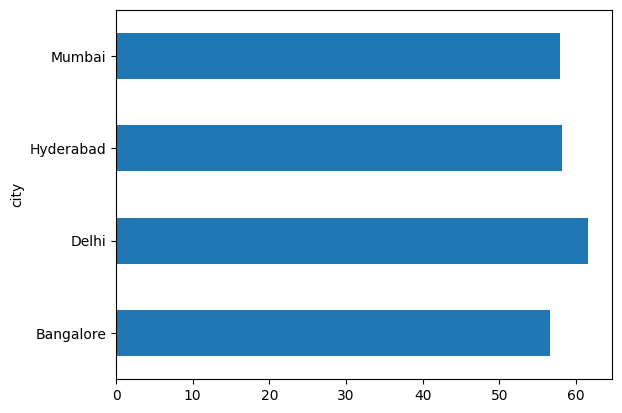

In [20]:
mrg_bgrm_hotels = pd.merge(mrg_bkngs_rooms, df_hotels,on='property_id')
mrg_bgrm_hotels.groupby('city')['ocp_prc'].mean().plot(kind='barh')

    3. When was the occupancy better

In [22]:
df =  pd.merge(mrg_bgrm_hotels, df_date,left_on='check_in_date',right_on='date')
df.groupby('day_type')['ocp_prc'].mean().round(2)

day_type
weekeday    50.90
weekend     72.39
Name: ocp_prc, dtype: float64

    4. In the month of June, what is the occupancy for diffrent cities?

In [25]:
df['mmm yy'].unique()

array(['May 22', 'Jun 22', 'Jul 22'], dtype=object)

In [34]:
df_june_22 = df[df['mmm yy'] == 'Jun 22']
df_june_22.head(5)
df_june_22.groupby('city')['ocp_prc'].mean().round(2).sort_values(ascending=False)

city
Delhi        62.47
Hyderabad    58.46
Mumbai       58.38
Bangalore    56.58
Name: ocp_prc, dtype: float64

In [37]:
df_aug = pd.read_csv('datasets/new_data_august.csv')
df = pd.concat([df, df_aug], ignore_index = True, axis = 0)
df.tail(5)

,property_id,check_in_date,room_category,successful_bookings,capacity,ocp_prc,room_class,property_name,category,city,date,mmm yy,week no,day_type,occ%
6509,19563,01-Aug-22,RT1,23,30.0,NaN,Standard,Atliq Palace,Business,Bangalore,NaN,Aug-22,W 32,weekeday,76.67
6510,19558,01-Aug-22,RT1,30,40.0,NaN,Standard,Atliq Grands,Luxury,Bangalore,NaN,Aug-22,W 32,weekeday,75.00
6511,19560,01-Aug-22,RT1,20,26.0,NaN,Standard,Atliq City,Business,Bangalore,NaN,Aug-22,W 32,weekeday,76.92
6512,17561,01-Aug-22,RT1,18,26.0,NaN,Standard,Atliq Blu,Luxury,Mumbai,NaN,Aug-22,W 32,weekeday,69.23
6513,17564,01-Aug-22,RT1,10,16.0,NaN,Standard,Atliq Seasons,Business,Mumbai,NaN,Aug-22,W 32,weekeday,62.50


    6. Print revenue realized per city 

In [38]:
df_bookings.head(5)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920


In [39]:
df_hotels.head(5)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [43]:
df_all_bookings = pd.merge(df_bookings, df_hotels, on = 'property_id')
df_all_bookings.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100,Atliq Grands,Luxury,Delhi


In [44]:
df_all_bookings.groupby('city')['revenue_realized'].sum()

city
Bangalore    420397050
Delhi        294500318
Hyderabad    325232870
Mumbai       668640991
Name: revenue_realized, dtype: int64

    7. Print month by month revenue

In [45]:
pd.merge(df_all_bookings,df_date, left_on = 'check_in_date', right_on = 'date')

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city,date,mmm yy,week no,day_type
